Langkah pertama adalah mengimport semua library yang dibutuhkan, numpy untuk memproses data numerik, matplotlib untuk membuat plot, pandas
untuk memproses data berbentuk dataframe (table), seaborn untuk visualisasi.

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Menggunakan pandas untuk membaca file csv lalu mengubah data menjadi dataframe

In [356]:
from pandas.core.internals.managers import T
used_cars = pd.read_csv('/content/toyota.csv')
used_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


Menggunakan fungsi info untuk mengetahui jenis variable(kolom), jumlah baris dan tipe data pada kolom tersebut.

In [357]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Menjalankan fungsi describe untuk mendapatkan ringkasan dari data, dan didapatkan nilai minimum 0 pada variabel tax dan enginesize, dan ini tidak sesuai dengan fakta karena tidak ada kendaraan yang engine sizenya 0.

In [358]:
used_cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Mengetahui banyak baris data yang bernilai 0 pada kolom tax dan engine size.

In [359]:
tax = (used_cars.tax == 0).sum()
engineSize = (used_cars.engineSize == 0).sum()

print("Nilai 0 di kolom tax ada: ", tax)
print("Nilai 0 di kolom engineSize ada: ", engineSize)

Nilai 0 di kolom tax ada:  1790
Nilai 0 di kolom engineSize ada:  6


Mendapatkan ringkasan data yang taxnya bernilai 0

In [360]:
used_cars.loc[(used_cars['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
820,Yaris,2016,12500,Automatic,23150,Hybrid,0,78.0,1.5
829,Yaris,2016,12695,Automatic,15945,Hybrid,0,78.0,1.5
830,Yaris,2014,10495,Automatic,29452,Hybrid,0,78.0,1.5
...,...,...,...,...,...,...,...,...,...
6318,Prius,2017,19295,Automatic,33124,Hybrid,0,85.6,1.8
6727,IQ,2009,3495,Manual,43000,Petrol,0,65.7,1.0
6728,IQ,2009,2699,Manual,74095,Petrol,0,65.7,1.0
6730,IQ,2013,4849,Manual,41142,Petrol,0,64.2,1.0


Menghapus baris data yang memiliki nilai 0 karena kita tidak tahu alasan mengapa pajak bisa 0. Kita juga menghapus engine size 0 karena tidak sesuai dengan fakta.

In [361]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
used_cars = used_cars.loc[(used_cars[['engineSize','tax']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
used_cars.shape

(4944, 9)

Menampilkan ringkasan data setelah menghapus data yang tax dan engine sizenya 0. Tidak didapatkan lagi nilai minimum 0.

In [362]:
used_cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,2017.149474,13204.217233,20276.212379,128.941141,58.918993,1.501274
std,2.317790,6806.206083,19381.921437,54.926950,15.952048,0.456611
min,1998.000000,850.000000,2.000000,10.000000,2.800000,1.000000
25%,2017.000000,8790.000000,7377.750000,135.000000,51.100000,1.000000
50%,2017.000000,10995.000000,14829.000000,145.000000,57.700000,1.500000
75%,2019.000000,16460.000000,27044.750000,145.000000,67.300000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Menampilkan data outliers dengan menggunakan metode IQR pada variabel year.

<Axes: xlabel='year'>

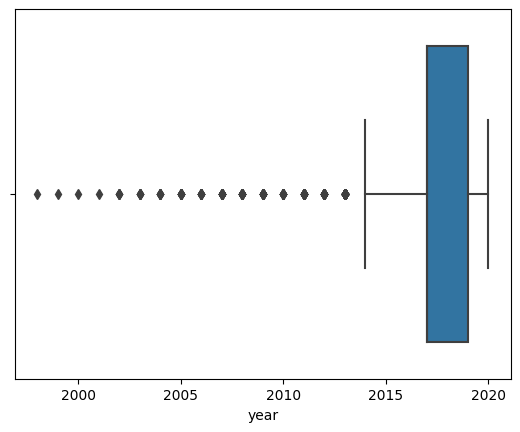

In [363]:
sns.boxplot(x=used_cars['year'])

Menampilkan data outliers dengan menggunakan metode IQR pada variabel engine size.

<Axes: xlabel='engineSize'>

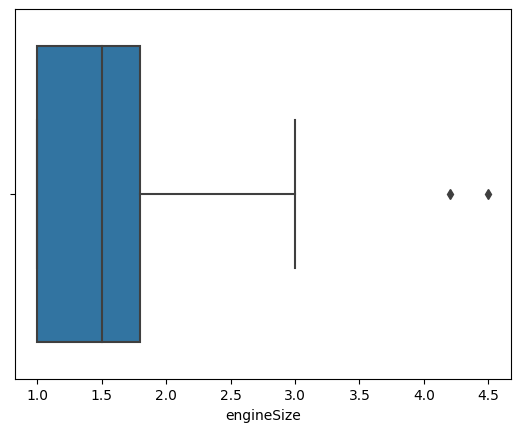

In [364]:
sns.boxplot(x=used_cars['engineSize'])

Menghapus data yang keluar dari IQR

In [365]:
Q1 = used_cars.quantile(0.25)
Q3 = used_cars.quantile(0.75)
IQR=Q3-Q1
used_cars=used_cars[~((used_cars<(Q1-1.5*IQR))|(used_cars>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
used_cars.shape

<ipython-input-365-88563db45ecf>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = used_cars.quantile(0.25)
<ipython-input-365-88563db45ecf>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = used_cars.quantile(0.75)
<ipython-input-365-88563db45ecf>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  used_cars=used_cars[~((used_cars<(Q1-1.5*IQR))|(used_cars>(Q3+1.5*IQR))).any(axis=1)]


(3434, 9)

Membagi variabel numerik dan variabel kategori.

In [366]:
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

Menampilkan persentase dan diagram pada variabel model

               jumlah sampel  persentase
 Aygo                   1221        35.6
 Yaris                  1084        31.6
 C-HR                    367        10.7
 Corolla                 249         7.3
 Auris                   181         5.3
 RAV4                    145         4.2
 Prius                    47         1.4
 Avensis                  46         1.3
 GT86                     44         1.3
 Verso                    34         1.0
 Camry                     9         0.3
 PROACE VERSO              7         0.2


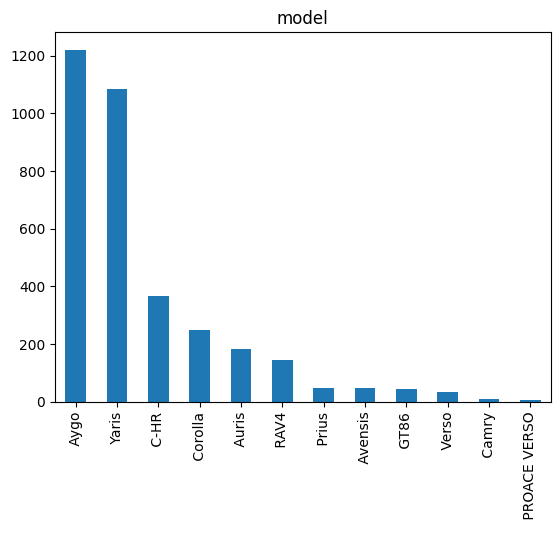

In [367]:
feature = categorical_features[0]
count = used_cars[feature].value_counts()
percent = 100*used_cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Menampilkan persentase dan diagram pada variabel transmission.

           jumlah sampel  persentase
Manual              2253        65.6
Automatic           1051        30.6
Semi-Auto            130         3.8


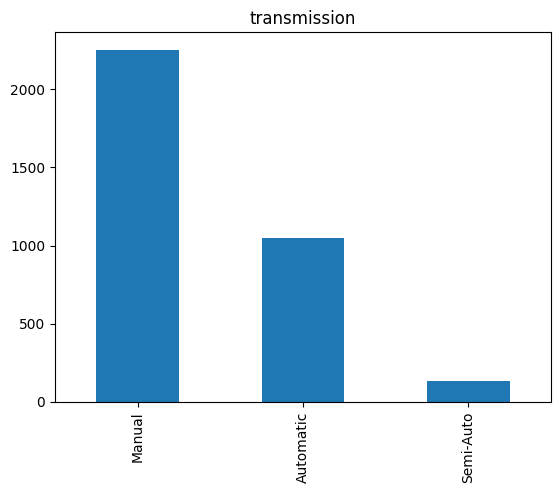

In [368]:
feature = categorical_features[1]
count = used_cars[feature].value_counts()
percent = 100*used_cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Menampilkan diagram pada variabel bertipe numerik.

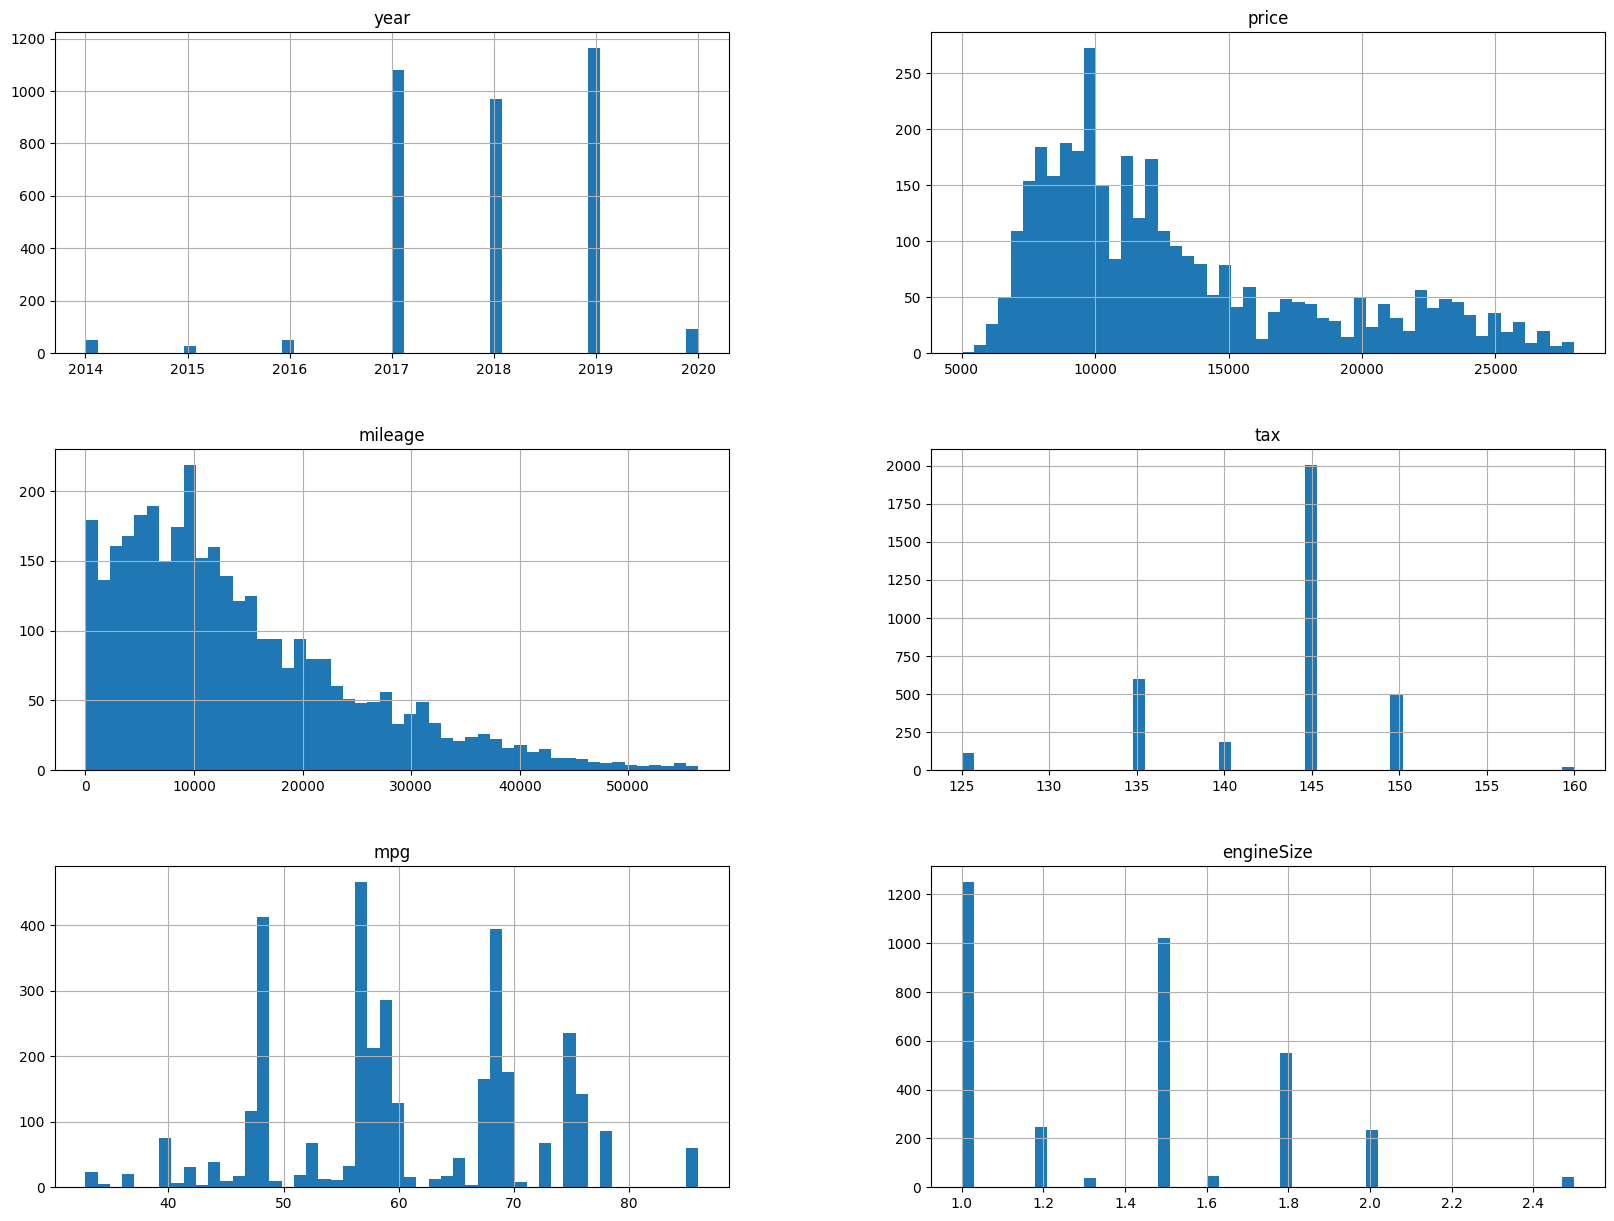

In [369]:
used_cars.hist(bins=50, figsize=(20,15))
plt.show()

Menampilkan rata-rata price pada variabel kategori

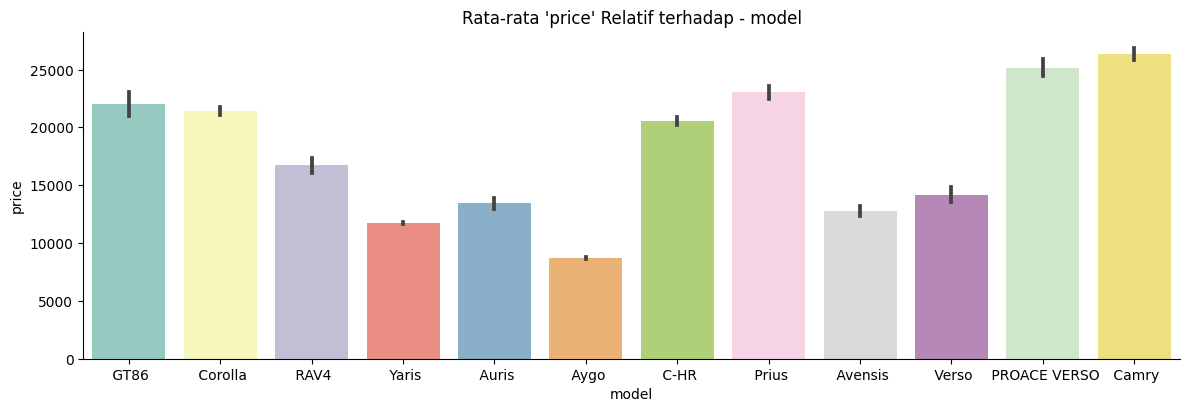

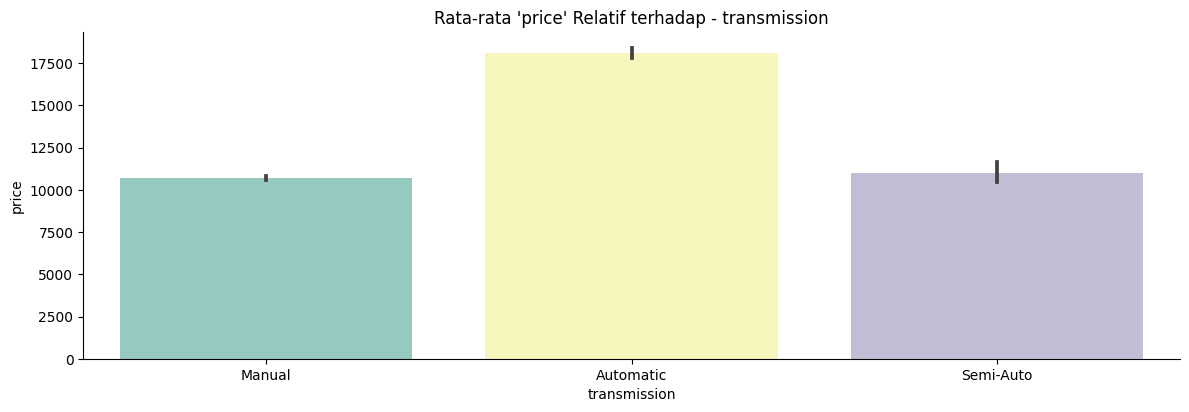

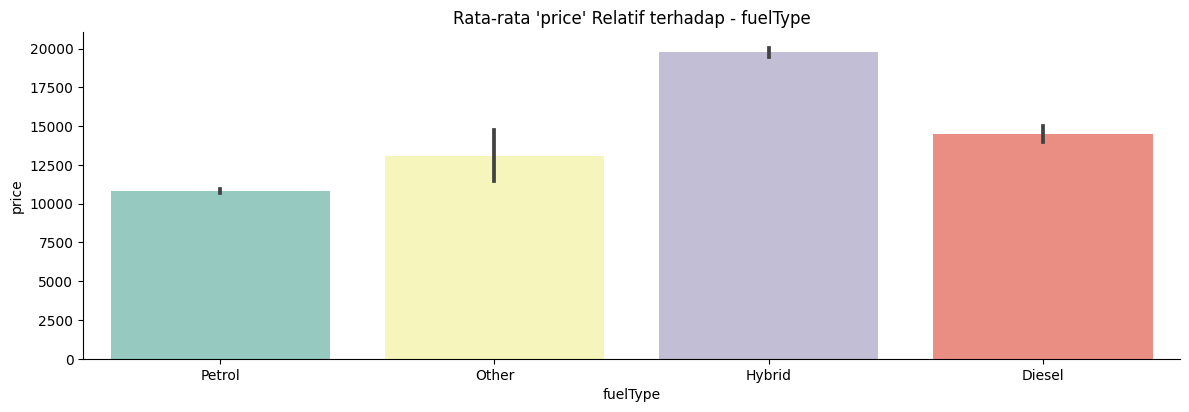

In [370]:
cat_features = used_cars.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=used_cars, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Mengamati hubungan antar variabel numerik

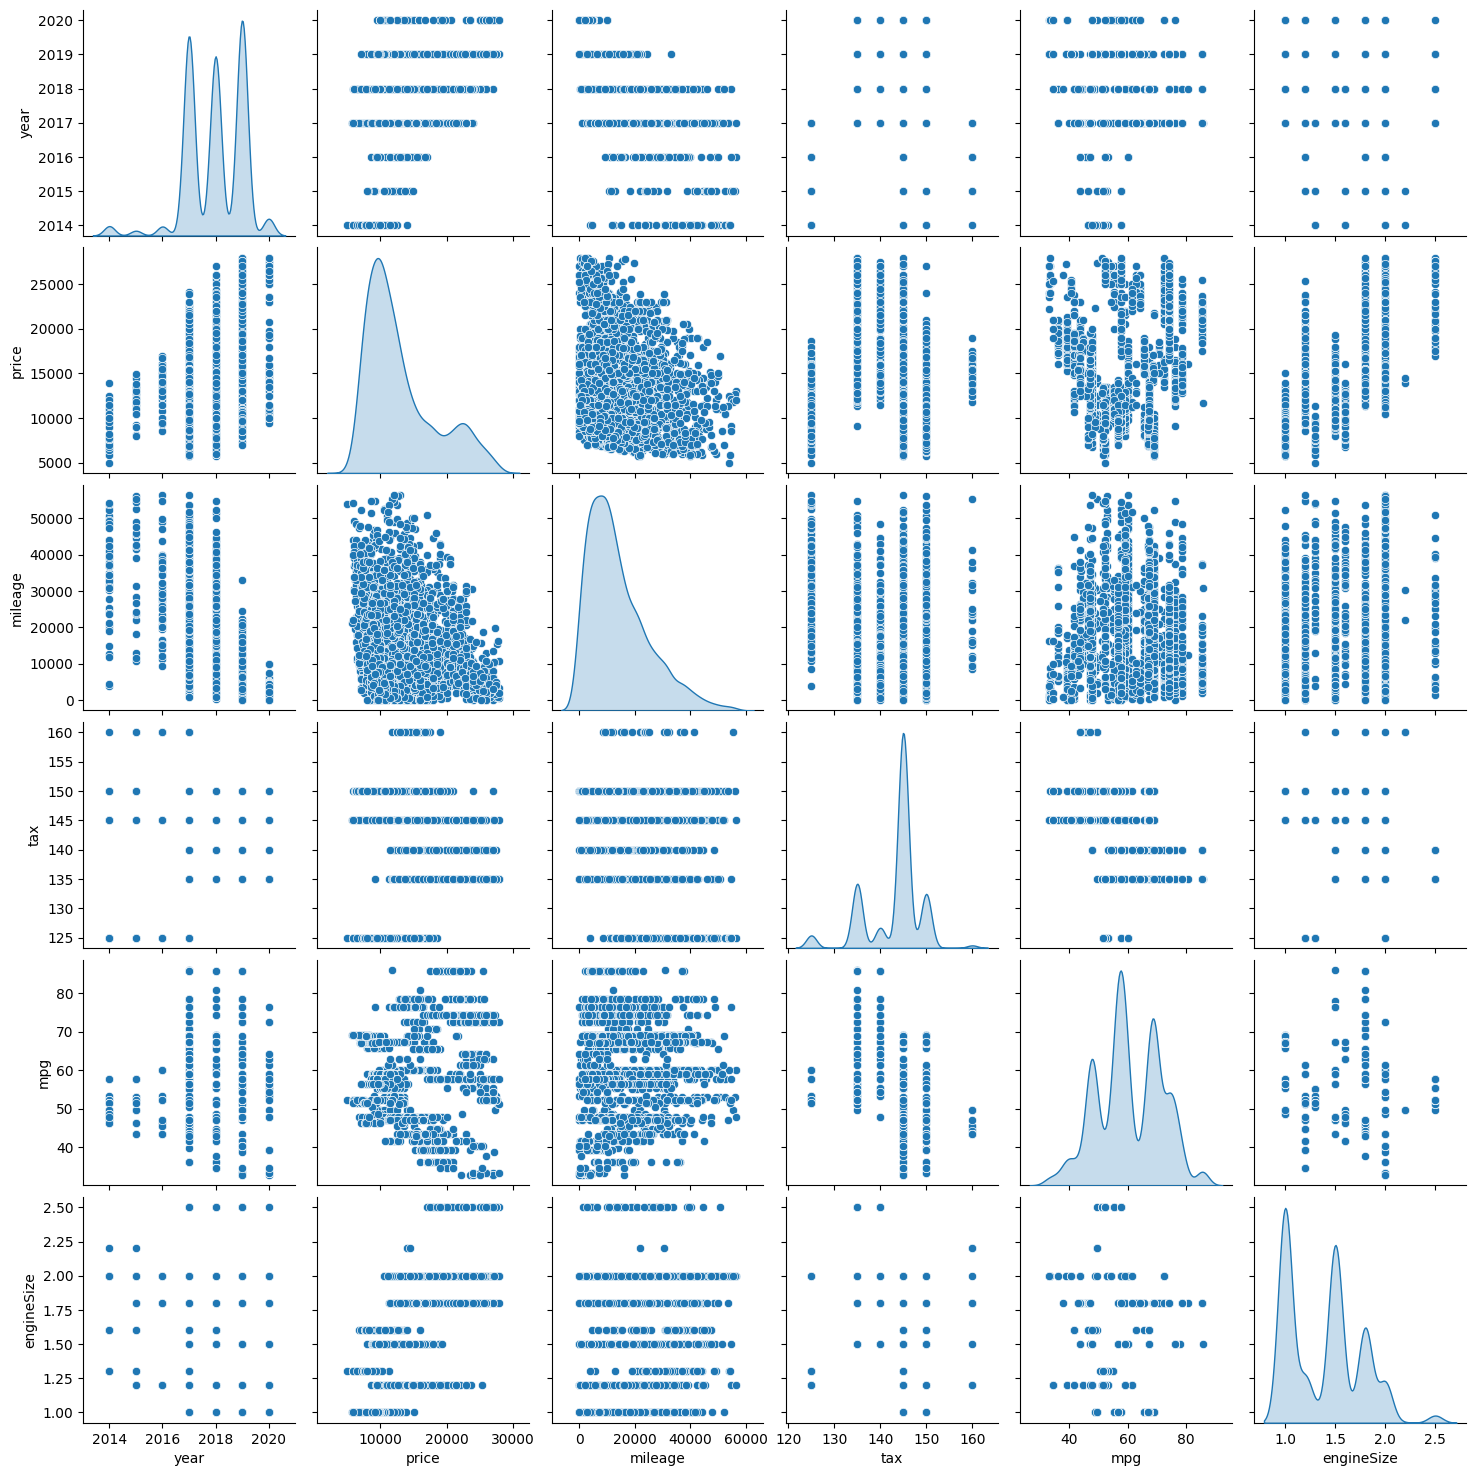

In [371]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(used_cars, diag_kind = 'kde')

Menampilkan hubungan/korelasi pada setiap variabel

<ipython-input-372-35ed0aa5d7cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = used_cars.corr().round(2)


<Axes: >

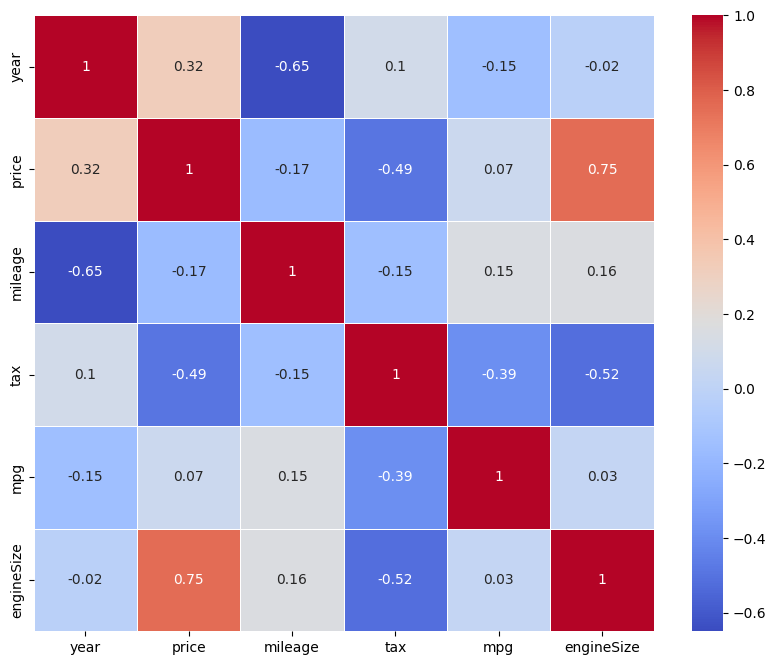

In [372]:
plt.figure(figsize=(10, 8))
correlation_matrix = used_cars.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )

Menghapus variabel yang tidak memiliki hubungan yang tinggi dengan variabel pricel

In [373]:
used_cars.drop(['model','mileage','tax','mpg'], inplace=True, axis=1)
used_cars.head()

,year,price,transmission,fuelType,engineSize
1,2017,15995,Manual,Petrol,2.0
3,2017,18998,Manual,Petrol,2.0
4,2017,17498,Manual,Petrol,2.0
6,2017,18522,Manual,Petrol,2.0
7,2017,18995,Manual,Petrol,2.0


Mengubah variabel kategorikal menjadi variabel numerik agar bisa diproses oleh algoritma.

In [374]:
from sklearn.preprocessing import  OneHotEncoder
used_cars = pd.concat([used_cars, pd.get_dummies(used_cars['transmission'], prefix='transmission')],axis=1)
used_cars = pd.concat([used_cars, pd.get_dummies(used_cars['fuelType'], prefix='fuelType')],axis=1)
used_cars.drop(['transmission', 'fuelType'], axis=1, inplace=True)
used_cars.head()

,year,price,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1,2017,15995,2.0,0,1,0,0,0,0,1
3,2017,18998,2.0,0,1,0,0,0,0,1
4,2017,17498,2.0,0,1,0,0,0,0,1
6,2017,18522,2.0,0,1,0,0,0,0,1
7,2017,18995,2.0,0,1,0,0,0,0,1


Membagi data menjadi 2 bagian, data latih dan data uji dengan persentase 90% data latih dan 10% data uji.

In [375]:
from sklearn.model_selection import train_test_split

X = used_cars.drop(["price"],axis =1)
y = used_cars["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Menampilkan banyak baris data setelah dibagi menajadi 2

In [376]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3434
Total # of sample in train dataset: 3090
Total # of sample in test dataset: 344


Mengubah skala data agar memiliki performa lebih baik, dengan mengubah mean menjadi 0 dan standar deviasi 1.

In [377]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['year','engineSize']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,engineSize
4506,0.027505,-1.074563
367,-1.840445,1.679356
3825,-0.906470,-1.074563
4612,0.961481,-1.074563
5686,-0.906470,-0.523779


Menampilkan mean 0 dan standar deviasi 1.

In [378]:
X_train[numerical_features].describe().round(4)

,year,engineSize
count,3090.0000,3090.0000
mean,-0.0000,0.0000
std,1.0002,1.0002
min,-3.7084,-1.0746
25%,-0.9065,-1.0746
50%,0.0275,0.3024
75%,0.9615,0.5778
max,1.8955,3.0563


Menyiapkan data untuk dianalisis, menetapkan variabel model dan metrik evaluasi.

In [379]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Melatih data menggunakan algoritma KNN

In [380]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Melatih data menggunakan random forest

In [381]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=55, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Melatih data menggunakan algoritma adaboost

In [382]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.02, random_state=30)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Melakukan scaling pada data uji

In [383]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Membuat variabel mse untuk masing-masing data latih dan data uji pada setiap algoritma

In [384]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,4895.848584,4852.641279
RF,2018.251199,1817.466727
Boosting,3881.23021,3382.545078


Menampilkan visualisasi nilai mse pada data latih dan data uji pada setiap algoritma.

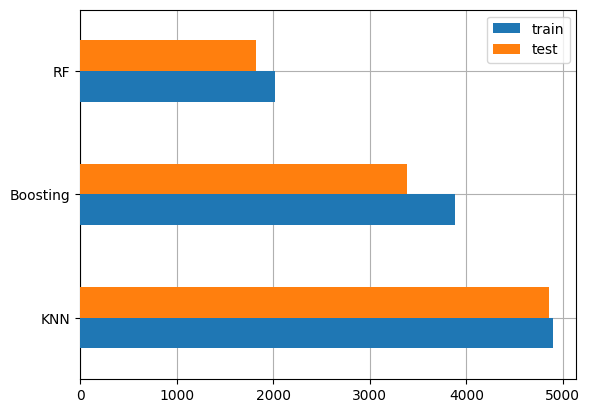

In [385]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Menggunakan model terbaik untuk memprediksi harga.

In [386]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4846,9450,9782.2,9732.3,9946.7
